# Data Loading

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# List all files in the current directory
files = os.listdir('.')
#print(files)  # Display all files in the current directory

# Remove specific file if it exists to avoid potential duplication during upload
if "hospital_quality.csv" in files:
    os.remove("hospital_quality.csv")
if "patient_experience.csv" in files:
    os.remove("patient_experience.csv")
if "readmission_rates.csv" in files:
    os.remove("readmission_rates.csv")
from google.colab import files  # Import the 'files' module to handle file uploads in Google Colab
uploaded = files.upload()  # Upload a file from local storage to Colab

# Define a function to clean problematic columns
def clean_column(column):
    return pd.to_numeric(column, errors='coerce')  # Convert non-numeric values to NaN

# Load datasets
quality_data = pd.read_csv('hospital_quality.csv')
experience_data = pd.read_csv('patient_experience.csv')

# Address dtype issue in 'readmission_rates.csv'
readmission_data = pd.read_csv(
    'readmission_rates.csv',
    low_memory=False,  # Avoid chunk processing
    converters={17: clean_column}  # Replace 17 with the column index/name
)

# Inspect the problematic column (optional)
print("Problematic Column in Readmission Rates (First 5 Rows):")
print(readmission_data.iloc[:, 17].head())  # Access column by index

# Check the data types after cleaning
print("\nData Types in Readmission Data:")
print(readmission_data.dtypes)

# Display a few rows from each dataset
print("\nReadmission Rates:")
print(readmission_data.head())

print("\nPatient Experience Data:")
print(experience_data.head())

print("\nHospital Quality Data:")
print(quality_data.head())


Saving hospital_quality.csv to hospital_quality.csv
Saving patient_experience.csv to patient_experience.csv
Saving readmission_rates.csv to readmission_rates.csv
Problematic Column in Readmission Rates (First 5 Rows):
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Footnote, dtype: float64

Data Types in Readmission Data:
Facility ID                     object
Facility Name                   object
Address                         object
City/Town                       object
State                           object
ZIP Code                         int64
County/Parish                   object
Telephone Number                object
Measure ID                      object
Measure Name                    object
Compared to National            object
Denominator                     object
Score                           object
Lower Estimate                  object
Higher Estimate                 object
Number of Patients              object
Number of Patients Returned     object
Footnote       

# EDA

In [68]:
# Standardize column names
quality_data.columns = quality_data.columns.str.lower().str.replace(' ', '_')
experience_data.columns = experience_data.columns.str.lower().str.replace(' ', '_')
readmission_data.columns = readmission_data.columns.str.lower().str.replace(' ', '_')

# Display updated column names
print(quality_data.columns)
print(experience_data.columns)
print(readmission_data.columns)

Index(['facility_id', 'facility_name', 'address', 'city/town', 'state',
       'zip_code', 'county/parish', 'telephone_number', 'hospital_type',
       'hospital_ownership', 'emergency_services',
       'meets_criteria_for_promoting_interoperability_of_ehrs',
       'meets_criteria_for_birthing_friendly_designation',
       'hospital_overall_rating', 'hospital_overall_rating_footnote',
       'mort_group_measure_count', 'count_of_facility_mort_measures',
       'count_of_mort_measures_better', 'count_of_mort_measures_no_different',
       'count_of_mort_measures_worse', 'mort_group_footnote',
       'safety_group_measure_count', 'count_of_facility_safety_measures',
       'count_of_safety_measures_better',
       'count_of_safety_measures_no_different',
       'count_of_safety_measures_worse', 'safety_group_footnote',
       'readm_group_measure_count', 'count_of_facility_readm_measures',
       'count_of_readm_measures_better',
       'count_of_readm_measures_no_different', 'count_of_

In [69]:
# Convert numeric columns to numeric types, coercing errors to NaN
quality_data = quality_data.apply(pd.to_numeric, errors='coerce')
experience_data = experience_data.apply(pd.to_numeric, errors='coerce')
readmission_data = readmission_data.apply(pd.to_numeric, errors='coerce')

# Now fill missing values with the column mean
quality_data.fillna(quality_data.mean(), inplace=True)
experience_data.fillna(experience_data.mean(), inplace=True)
readmission_data.fillna(readmission_data.mean(), inplace=True)


quality_data.dropna(subset=['facility_id'], inplace=True)
experience_data.dropna(subset=['facility_id'], inplace=True)
readmission_data.dropna(subset=['facility_id'], inplace=True)

In [70]:
# Now fill missing values with the column mean
quality_data.fillna(quality_data.mean(), inplace=True)
experience_data.fillna(experience_data.mean(), inplace=True)
readmission_data.fillna(readmission_data.mean(), inplace=True)

In [71]:
for df in [quality_data, experience_data, readmission_data]:
    df.replace(r'[^0-9.]', '', regex=True, inplace=True)  # Remove non-numeric characters
    df = df.apply(pd.to_numeric, errors='coerce')         # Convert to numeric


In [72]:
print(quality_data.columns)
print(experience_data.columns)
print(readmission_data.columns)

Index(['facility_id', 'facility_name', 'address', 'city/town', 'state',
       'zip_code', 'county/parish', 'telephone_number', 'hospital_type',
       'hospital_ownership', 'emergency_services',
       'meets_criteria_for_promoting_interoperability_of_ehrs',
       'meets_criteria_for_birthing_friendly_designation',
       'hospital_overall_rating', 'hospital_overall_rating_footnote',
       'mort_group_measure_count', 'count_of_facility_mort_measures',
       'count_of_mort_measures_better', 'count_of_mort_measures_no_different',
       'count_of_mort_measures_worse', 'mort_group_footnote',
       'safety_group_measure_count', 'count_of_facility_safety_measures',
       'count_of_safety_measures_better',
       'count_of_safety_measures_no_different',
       'count_of_safety_measures_worse', 'safety_group_footnote',
       'readm_group_measure_count', 'count_of_facility_readm_measures',
       'count_of_readm_measures_better',
       'count_of_readm_measures_no_different', 'count_of_

In [73]:
# Merge datasets on 'hospital_id'
merged_data = pd.merge(quality_data, experience_data, on='facility_id', how='inner')
merged_data = pd.merge(merged_data, readmission_data, on='facility_id', how='inner')

# Display the merged dataset
print(merged_data.head())

   facility_id  facility_name_x  address_x  city/town_x  state_x  zip_code_x  \
0      10001.0              NaN        NaN          NaN      NaN       36301   
1      10001.0              NaN        NaN          NaN      NaN       36301   
2      10001.0              NaN        NaN          NaN      NaN       36301   
3      10001.0              NaN        NaN          NaN      NaN       36301   
4      10001.0              NaN        NaN          NaN      NaN       36301   

   county/parish_x  telephone_number_x  hospital_type  hospital_ownership  \
0              NaN                 NaN            NaN                 NaN   
1              NaN                 NaN            NaN                 NaN   
2              NaN                 NaN            NaN                 NaN   
3              NaN                 NaN            NaN                 NaN   
4              NaN                 NaN            NaN                 NaN   

   ...  compared_to_national  denominator  score  lower_

## Outliers

To define the ouliers we use the following method:
outliers are data points lying beyond **(third quartile + 1.5xIQR)** and below **(first quartile - 1.5xIQR)** .

In [74]:
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ['feature', 'outliers'])
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            df_new_row = pd.DataFrame({'feature':[column], 'outliers':[df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]]})
            outliers = pd.concat([outliers, df_new_row], ignore_index=True)
    return outliers

print(detect_outliers(merged_data))

                        feature outliers
0                   facility_id        0
1               facility_name_x        0
2                     address_x        0
3                   city/town_x        0
4                       state_x        0
..                          ...      ...
74           number_of_patients    72060
75  number_of_patients_returned    72060
76                     footnote   123590
77                 start_date_y        0
78                   end_date_y        0

[79 rows x 2 columns]


# EDA and Vizualization

In [75]:
def select_numeric_columns_with_meaningful_data(df):
    # Step 1: Select only numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    numeric_data = df[numeric_columns]

    # Step 2: Drop columns with all NaN values
    numeric_data = numeric_data.dropna(axis=1, how='all')  # Removes columns where all values are NaN

    # Step 3: Handle NaN values in remaining columns
    # Option 1: Drop rows with NaN values in remaining numeric columns
    numeric_data = numeric_data.dropna(axis=0, how='any')  # Drops any row that has NaN in any column

    # Option 2: Fill NaN values with the median (or mean)
    # numeric_data = numeric_data.fillna(numeric_data.median())  # Fill NaNs with column median

    return numeric_data

# Example usage
filtered_data = select_numeric_columns_with_meaningful_data(merged_data)

# Display the cleaned dataset
print(filtered_data.head())


   facility_id  zip_code_x  hospital_overall_rating  \
0      10001.0       36301                      3.0   
1      10001.0       36301                      3.0   
2      10001.0       36301                      3.0   
3      10001.0       36301                      3.0   
4      10001.0       36301                      3.0   

   hospital_overall_rating_footnote  mort_group_measure_count  \
0                         16.840413                       7.0   
1                         16.840413                       7.0   
2                         16.840413                       7.0   
3                         16.840413                       7.0   
4                         16.840413                       7.0   

   count_of_facility_mort_measures  count_of_mort_measures_better  \
0                              7.0                            1.0   
1                              7.0                            1.0   
2                              7.0                            1.0   
3 

In [76]:
import pandas as pd

def drop_columns_with_all_nan(df):
    # Ensure NaN values are correctly recognized
    df = df.where(pd.notnull(df), None)  # Replace any NaN-like values with None

    # Drop columns where all values are None or NaN
    df_cleaned = df.dropna(axis=1, how='all')

    return df_cleaned

# Apply the function to your DataFrame
cleaned_data = drop_columns_with_all_nan(merged_data)

# Display the cleaned dataset
print(cleaned_data.head())

# Optionally, check the columns that remain
print("Remaining Columns after dropping NaNs:", cleaned_data.columns.tolist())

   facility_id  zip_code_x  hospital_overall_rating  \
0      10001.0       36301                      3.0   
1      10001.0       36301                      3.0   
2      10001.0       36301                      3.0   
3      10001.0       36301                      3.0   
4      10001.0       36301                      3.0   

   hospital_overall_rating_footnote  mort_group_measure_count  \
0                         16.840413                       7.0   
1                         16.840413                       7.0   
2                         16.840413                       7.0   
3                         16.840413                       7.0   
4                         16.840413                       7.0   

   count_of_facility_mort_measures  count_of_mort_measures_better  \
0                              7.0                            1.0   
1                              7.0                            1.0   
2                              7.0                            1.0   
3 

In [77]:
# Merge datasets on 'hospital_id'
merged_data = pd.merge(quality_data, experience_data, on='facility_id', how='inner')
merged_data = pd.merge(merged_data, readmission_data, on='facility_id', how='inner')

# Display the merged dataset
print(merged_data.mean())

facility_id                    261505.470875
facility_name_x                          NaN
address_x                                NaN
city/town_x                              NaN
state_x                                  NaN
                                   ...      
number_of_patients                223.964503
number_of_patients_returned        64.915301
footnote                            3.772355
start_date_y                             NaN
end_date_y                               NaN
Length: 79, dtype: float64


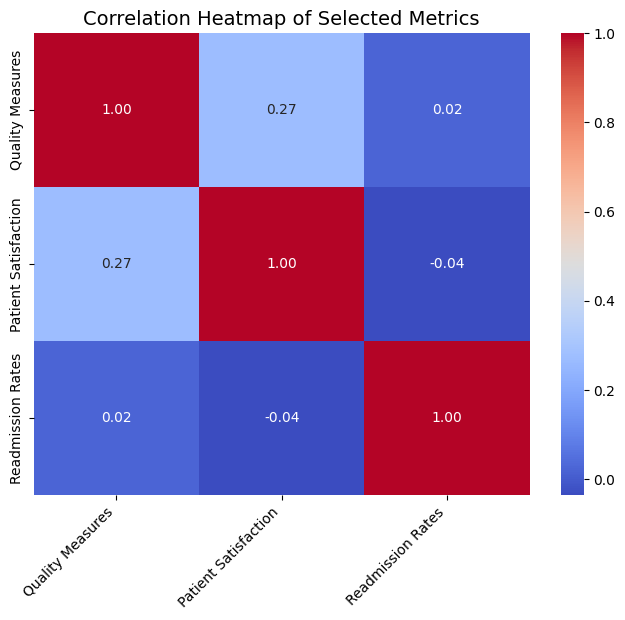

In [78]:
# Extract the specific columns and rename them
selected_columns = merged_data[['hospital_overall_rating', 'hcahps_linear_mean_value', 'number_of_patients_returned']].rename(
    columns={
        'hospital_overall_rating': 'Quality Measures',
        'hcahps_linear_mean_value': 'Patient Satisfaction',
        'number_of_patients_returned': 'Readmission Rates'
    }
)

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size for clarity
sns.heatmap(selected_columns.corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap of Selected Metrics", fontsize=14)
plt.xticks(fontsize=10, rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(fontsize=10)
plt.show()


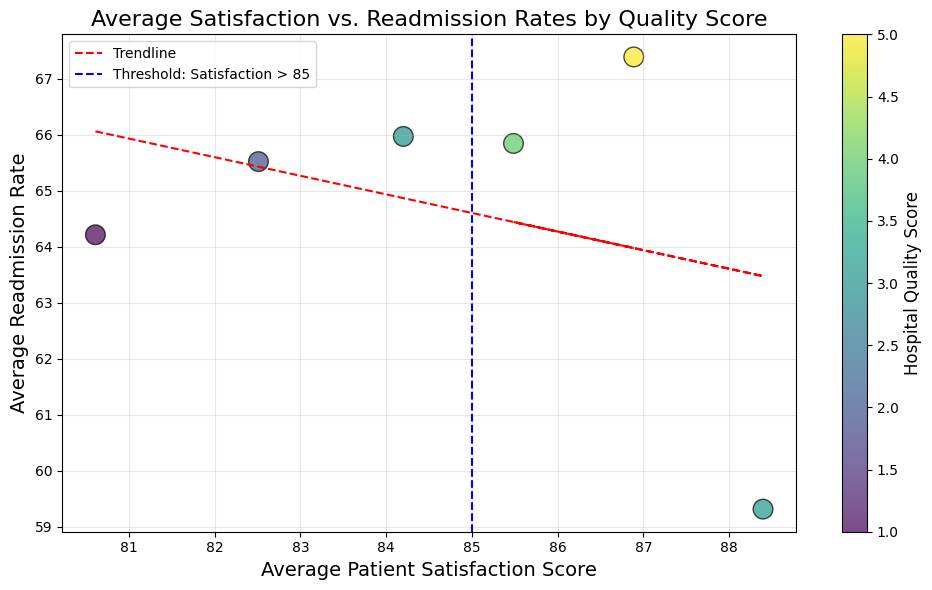

In [79]:
import matplotlib.pyplot as plt
import numpy as np

aggregated_data = merged_data.groupby('hospital_overall_rating').agg({
    'hcahps_linear_mean_value': 'mean',  # Average Patient Satisfaction
    'number_of_patients_returned': 'mean'            # Average Readmission Rate
}).reset_index()

# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    aggregated_data['hcahps_linear_mean_value'],  # Satisfaction scores
    aggregated_data['number_of_patients_returned'],  # Readmission rates
    c=aggregated_data['hospital_overall_rating'],  # Quality scores
    cmap='viridis',
    s=200,
    edgecolor='k',
    alpha=0.7
)
cbar = plt.colorbar(scatter)
cbar.set_label("Hospital Quality Score", fontsize=12)

# Add trendline
z = np.polyfit(
    aggregated_data['hcahps_linear_mean_value'],
    aggregated_data['number_of_patients_returned'],
    1  # Linear regression
)
p = np.poly1d(z)
plt.plot(
    aggregated_data['hcahps_linear_mean_value'],
    p(aggregated_data['hcahps_linear_mean_value']),
    color='red', linestyle='--', label="Trendline"
)

# Add satisfaction threshold line
plt.axvline(x=85, color='blue', linestyle='--', label="Threshold: Satisfaction > 85")

plt.xlabel("Average Patient Satisfaction Score", fontsize=14)
plt.ylabel("Average Readmission Rate", fontsize=14)
plt.title("Average Satisfaction vs. Readmission Rates by Quality Score", fontsize=16)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


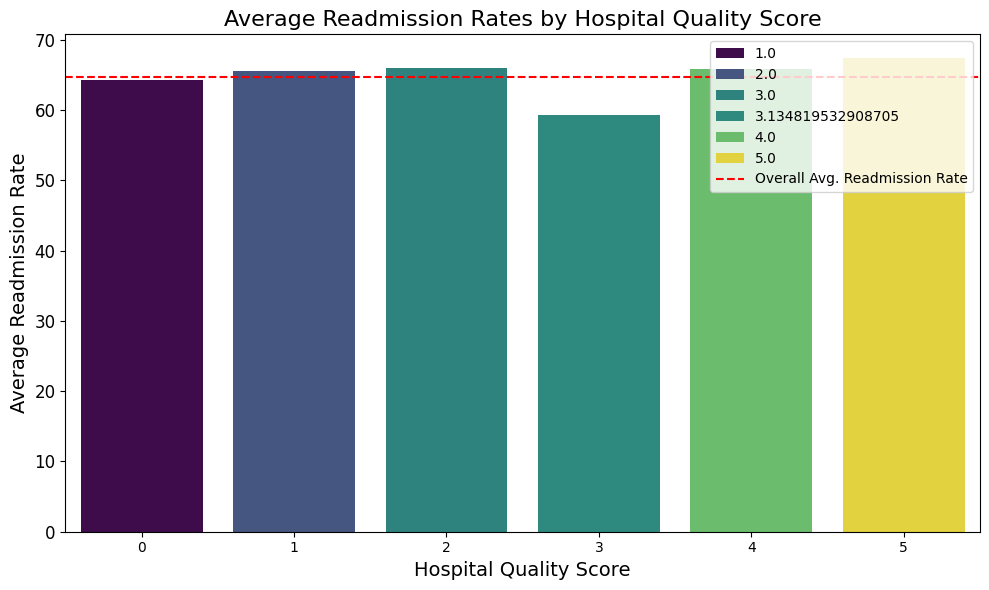

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot with hue set to 'hospital_overall_rating' for color mapping
plt.figure(figsize=(10, 6))
sns.barplot(
    x='hospital_overall_rating',
    y='number_of_patients_returned',
    data=aggregated_data,
    hue='hospital_overall_rating',  # Assign hue to match x-axis variable
    palette="viridis"  # Applies colormap
)

# Add horizontal line for the overall average readmission rate
plt.axhline(
    y=aggregated_data['number_of_patients_returned'].mean(),
    color='red', linestyle='--', label='Overall Avg. Readmission Rate'
)

# Set the labels and title
plt.xlabel("Hospital Quality Score", fontsize=14)
plt.ylabel("Average Readmission Rate", fontsize=14)
plt.title("Average Readmission Rates by Hospital Quality Score", fontsize=16)

# Format the axis ticks to show integer values only
plt.gca().tick_params(axis='y', labelsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))  # Remove decimals
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))  # Remove decimals

# Remove the 'hospital_quality_score' in the legend
plt.legend(loc='upper right')  # Only the red line will appear in the legend
plt.tight_layout()
plt.show()


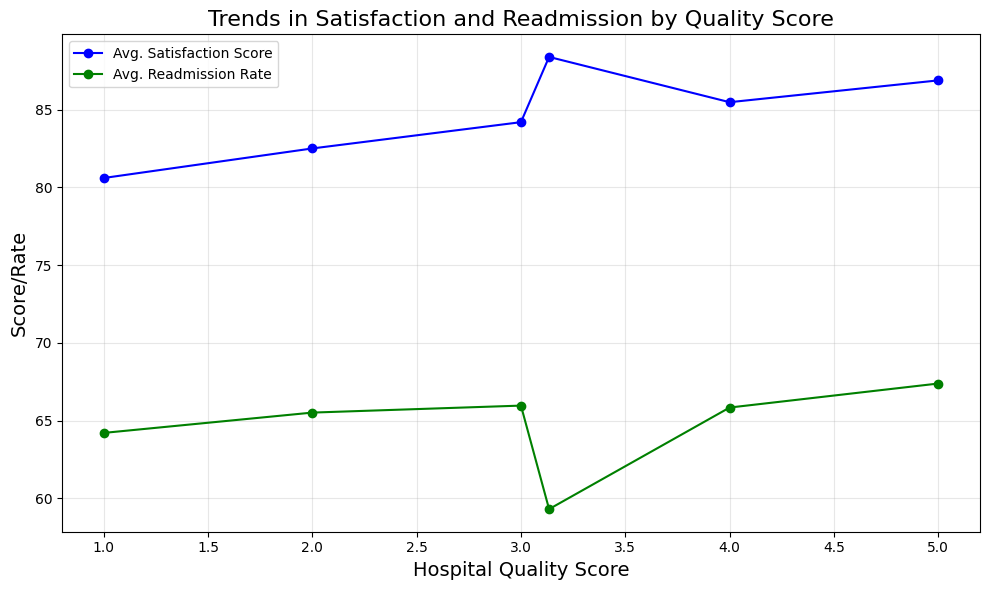

In [81]:
# Line plot for satisfaction and readmission rates
plt.figure(figsize=(10, 6))
plt.plot(
    aggregated_data['hospital_overall_rating'],
    aggregated_data['hcahps_linear_mean_value'],
    marker='o', label="Avg. Satisfaction Score", color='blue'
)
plt.plot(
    aggregated_data['hospital_overall_rating'],
    aggregated_data['number_of_patients_returned'],
    marker='o', label="Avg. Readmission Rate", color='green'
)

plt.xlabel("Hospital Quality Score", fontsize=14)
plt.ylabel("Score/Rate", fontsize=14)
plt.title("Trends in Satisfaction and Readmission by Quality Score", fontsize=16)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Skewness

In [82]:
# Check Skewness

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# Extract relevant columns
features = merged_data[['hcahps_linear_mean_value', 'number_of_patients_returned']]
target = merged_data['hospital_overall_rating']

# Compute skewness
print("Skewness of Features and Target:")
print(features.skew())
print("Skewness of Target:")
print(target.skew())


Skewness of Features and Target:
hcahps_linear_mean_value      -0.589567
number_of_patients_returned    7.204987
dtype: float64
Skewness of Target:
-0.14127643687374533


# Linear Regression

In [83]:
#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluate
print("\nLinear Regression (Original Data):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))



Linear Regression (Original Data):
Mean Squared Error: 1.0852462155757925
R² Score: 0.07309525652928384


In [84]:
# Apply log transformation (add small constant to avoid log(0))
log_features = np.log1p(features)
log_target = np.log1p(target)

# Check skewness after log transformation
print("\nSkewness after Log Transformation:")
print(log_features.skew())
print("Skewness of Log-Transformed Target:")
print(log_target.skew())

# Train-test split for log-transformed data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(log_features, log_target, test_size=0.2, random_state=42)

# Train Log-Linear Regression
log_linear_model = LinearRegression()
log_linear_model.fit(X_train_log, y_train_log)

# Predictions
y_pred_log = log_linear_model.predict(X_test_log)

# Evaluate
print("\nLog-Linear Regression:")
print("Mean Squared Error:", mean_squared_error(np.expm1(y_test_log), np.expm1(y_pred_log)))
print("R² Score:", r2_score(np.expm1(y_test_log), np.expm1(y_pred_log)))



Skewness after Log Transformation:
hcahps_linear_mean_value      -0.80085
number_of_patients_returned   -1.88846
dtype: float64
Skewness of Log-Transformed Target:
-0.8142280431702286

Log-Linear Regression:
Mean Squared Error: 1.1067182612567465
R² Score: 0.05475606242931985


Linear Regression Results:
Mean Squared Error (MSE): 1.09
Mean Absolute Error (MAE): 0.83
R-squared (R2): 0.07

Log-Linear Regression Results:
Mean Squared Error (MSE): 1.11
Mean Absolute Error (MAE): 0.84
R-squared (R2): 0.05


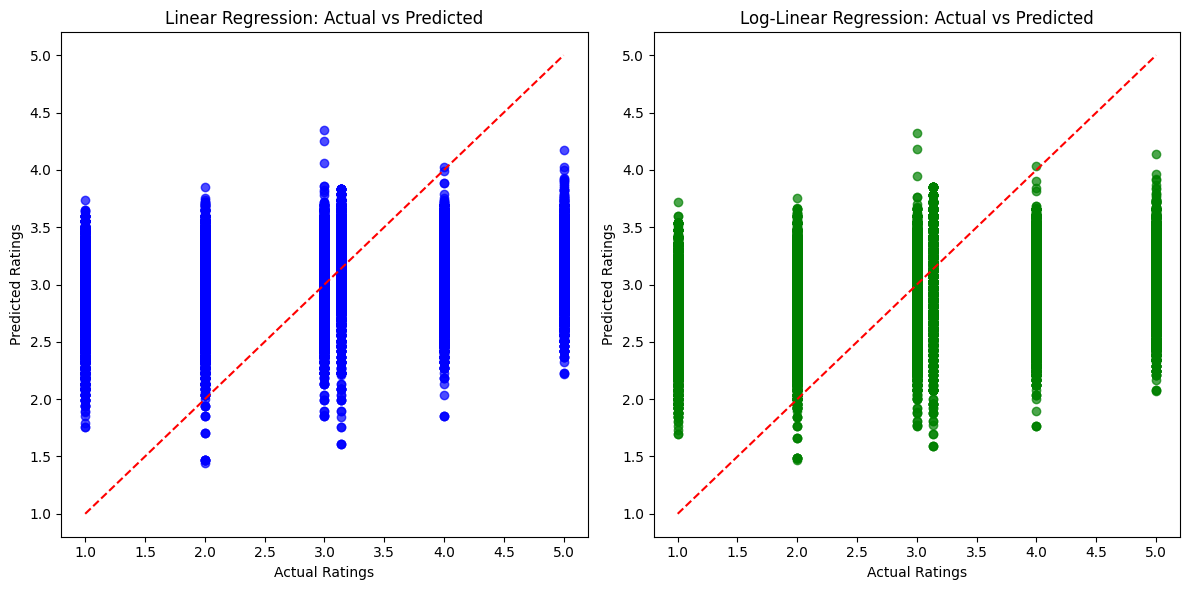

In [85]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Select features and target
X = merged_data[['hcahps_linear_mean_value', 'number_of_patients_returned']]
y = merged_data['hospital_overall_rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions on test data
y_pred_linear = linear_model.predict(X_test)

# Evaluation metrics for Linear Regression
print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_linear):.2f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred_linear):.2f}")

# Log-Linear Regression (Apply logarithm to target variable)
y_train_log = np.log1p(y_train)  # log(1 + y) to avoid log(0)
y_test_log = np.log1p(y_test)

log_linear_model = LinearRegression()
log_linear_model.fit(X_train, y_train_log)

# Predictions on test data (inverse transformation for comparison)
y_pred_log_linear = np.expm1(log_linear_model.predict(X_test))  # exp(y) - 1 to reverse log1p transformation

# Evaluation metrics for Log-Linear Regression
print("\nLog-Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_log_linear):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_log_linear):.2f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred_log_linear):.2f}")

# Visualization of Predictions
plt.figure(figsize=(12, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Fixed color conflict
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Linear Regression: Actual vs Predicted")

# Log-Linear Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_log_linear, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Fixed color conflict
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Log-Linear Regression: Actual vs Predicted")

plt.tight_layout()
plt.show()


# Analysis

- Both models exhibit poor performance, as indicated by their low 𝑅2 values (0.07 and 0.05), demonstrating their inability to effectively capture the relationship between the features (hcahps_linear_mean_value and number_of_patients_returned) and the target variable (hospital_overall_rating).
- The minimal differences in MSE and MAE between the models suggest that applying the logarithmic transformation did not offer a significant improvement.
- To enhance the model's performance, incorporating additional features, exploring non-linear models, or engineering more relevant features may prove beneficial.

# Random Forest Classifier

Classification Report:
              precision    recall  f1-score   support

        High       0.35      0.02      0.03      9268
         Low       0.53      0.12      0.20     22764
      Medium       0.64      0.96      0.77     54012

    accuracy                           0.63     86044
   macro avg       0.51      0.36      0.33     86044
weighted avg       0.58      0.63      0.54     86044

Accuracy Score:
0.6332457812282088


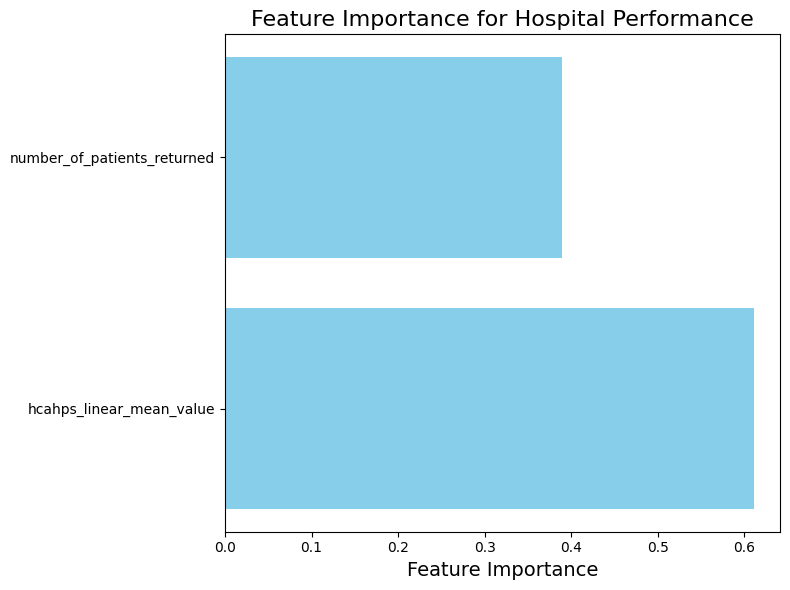

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features and target
X = merged_data[['hcahps_linear_mean_value', 'number_of_patients_returned']]
y = merged_data['hospital_overall_rating']

# Convert continuous target to categorical
bins = [0, 2, 4, 5]  # Adjust based on the range of hospital_overall_rating
labels = ['Low', 'Medium', 'High']
y_categorical = pd.cut(y, bins=bins, labels=labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame with feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Feature Importance
importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importance, color='skyblue')
plt.xlabel("Feature Importance", fontsize=14)
plt.title("Feature Importance for Hospital Performance", fontsize=16)
plt.tight_layout()
plt.show()


# GradientBoostingRegressor

Gradient Boosting Results:
Mean Squared Error (MSE): 1.07
Mean Absolute Error (MAE): 0.82
R-squared (R²): 0.08


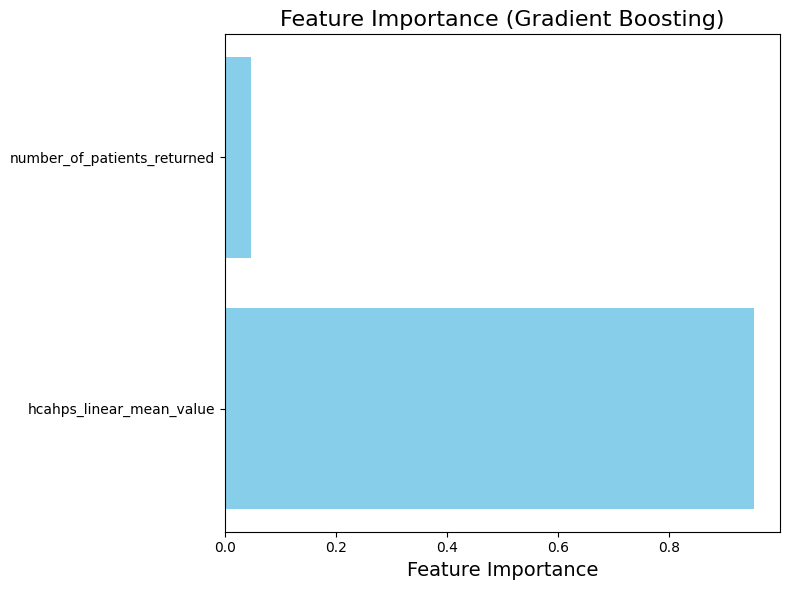

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Instead of y_train (categorical), use the original continuous target variable (y)
gb_model.fit(X_train, y.loc[X_train.index])  # Use y values corresponding to X_train index

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
mse_gb = mean_squared_error(y.loc[X_test.index], y_pred_gb)  # Use y values corresponding to X_test index
mae_gb = mean_absolute_error(y.loc[X_test.index], y_pred_gb)
r2_gb = r2_score(y.loc[X_test.index], y_pred_gb)

print("Gradient Boosting Results:")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"R-squared (R²): {r2_gb:.2f}")

# Feature Importance
import matplotlib.pyplot as plt

feature_importance = gb_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance", fontsize=14)
plt.title("Feature Importance (Gradient Boosting)", fontsize=16)
plt.tight_layout()
plt.show()